In [ ]:
import pandas as pd
# import numpy as np
df = pd.read_csv("marks.csv")
df

In [ ]:
gp=df.groupby('Game')

In [ ]:
gp

In [ ]:
classname=df.groupby(["Class","Game"])

In [ ]:
classname.groups

In [ ]:
s=classname.size()

In [ ]:
s.plot(kind="bar")

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["Marks"])

In [ ]:
df.groupby(["Gender","Game"])["Game"].count()

In [ ]:
k=["Game","Gender",'Class']
s=df.groupby(k)
s.groups

In [ ]:
s.plot(kind="bar")

In [ ]:
k=["Game","Gender",'Class']
s=df.groupby(k).count()
s.plot(kind="bar")

## SELF PRACTICE

## https://www.dataquest.io/blog/pandas-tutorial-python-2/

In [18]:
import numpy as np
import pandas as pd

data=pd.read_csv("thank.csv")
data.head(3)

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain


In [ ]:
data["Do you celebrate Thanksgiving?"].unique()

In [ ]:
data.columns[50:]

In [ ]:
data["What is your gender?"].value_counts(dropna=False)

In [40]:
import math

def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "Female")

In [41]:
data["gender"] = data["What is your gender?"].apply(gender_code)
data["gender"].value_counts(dropna=False)

1.0    544
0.0    481
NaN     33
Name: gender, dtype: int64

In [ ]:
data.apply(lambda x: x.dtype).head()

In [ ]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(dropna=False)

In [37]:
income_high=0
income_low=0
def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    else:
        value = value.replace(",", "").replace("$",'')
        income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low)) / 2 

                                           
                                           
                                           
data["income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
data["income"].head()

0     87499.5
1     62499.5
2      4999.5
3    200000.0
4    112499.5
Name: income, dtype: float64

In [32]:

def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    else:
        value = value.replace(",", "")
        value=value.replace(" to ", "")
        low=value[value.find("$")+1:value.find("$",1)]
        high=value[value.find("$",2)+1:]
        value=int(high)+int(low)/2
    return value

                                           
                                           
                                           
data["income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
data["income"].head(15)

0     137499.0
1      99999.0
2       9999.0
3     200000.0
4     174999.0
5       9999.0
6      62499.0
7          NaN
8     137499.0
9      62499.0
10     62499.0
11     62499.0
12      9999.0
13      9999.0
14     99999.0
Name: income, dtype: float64

In [ ]:
data["What type of cranberry saucedo you typically have?"].value_counts()

In [ ]:
# homemade = data[data["What type of cranberry saucedo you typically have?"] == "Homemade"]
# canned = data[data["What type of cranberry saucedo you typically have?"] == "Canned"]

In [ ]:
# print(homemade["How much total combined money did all members of your HOUSEHOLD earn last year?"])
# print(canned["How much total combined money did all members of your HOUSEHOLD earn last year?"])

In [ ]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped.groups

In [ ]:
grouped.size()

In [ ]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

In [ ]:
grouped.agg(np.mean)

In [ ]:
grouped = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x:x.value_counts())

In [ ]:
# grouped = data.groupby(["What type of cranberry sauce do you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
# grouped.agg(np.mean)

# http://suruchifialoke.com/2016-09-02-thanksgiving-pandas/

In [42]:
# Importing relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import re
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
# Reading data
data = pd.read_csv("thank.csv", encoding="Latin-1")

In [2]:
# indices of rows for people who celebrate Thanksgiving
yes_celebrating = data['Do you celebrate Thanksgiving?']=='Yes'

# Keep the rows for which [Do you celebrate Thanksgiving?]= Yes
data = data[yes_celebrating] 


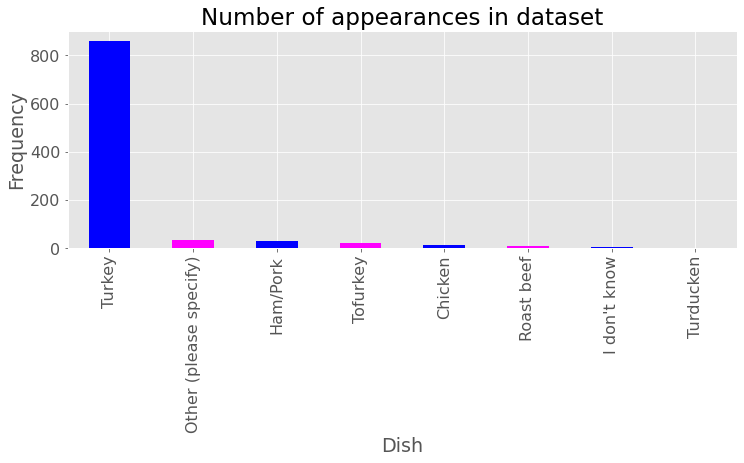

In [3]:
# Count how many times each category occurs 
dish_type = pd.value_counts(data['What is typically the main dish at your Thanksgiving dinner?'].values, sort=True)

#Now make a pie chart
plt.figure(figsize=(12,4))
dish_type.plot(kind='bar', color=['blue', 'magenta'])
plt.ylabel('Frequency')
plt.xlabel('Dish')
plt.title('Number of appearances in dataset')
plt.show()

In [44]:
#apple
apple_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
apple_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
#pumpkin
pumpkin_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
pumpkin_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
#pecan
pecan_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])
pecan_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])

In [45]:
no_pies = apple_isnull & pumpkin_isnull & pecan_isnull
only_apple_pies = apple_notnull & pumpkin_isnull & pecan_isnull
only_pumpkin_pies = apple_isnull & pumpkin_notnull & pecan_isnull
only_pecan_pies = apple_isnull & pumpkin_isnull & pecan_notnull
# create a dictionary with pie counts
pie_types = {}
pie_types['Apple'] = pd.value_counts(only_apple_pies)[1]
pie_types['Pumpkin'] = pd.value_counts(only_pumpkin_pies)[1]
pie_types['Pecan'] = pd.value_counts(only_pecan_pies)[1]
pie_types['None'] = pd.value_counts(no_pies)[1]
pie_types['Multiple'] = pd.value_counts(no_pies)[0] - pie_types['Apple'] - pie_types['Pumpkin'] - pie_types['Pecan'] 

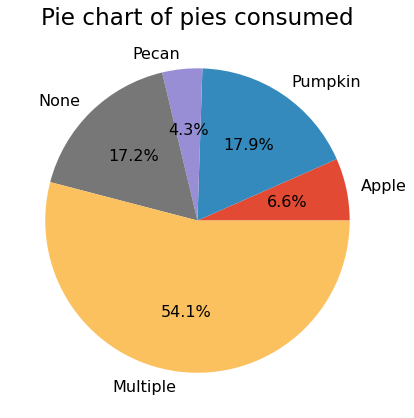

In [46]:
# plot pie data in pie chart 
plt.figure(figsize=(7,7))
plt.pie([int(v) for v in pie_types.values()],labels=pie_types.keys(), autopct='%1.1f%%')
plt.title("Pie chart of pies consumed")
plt.show()

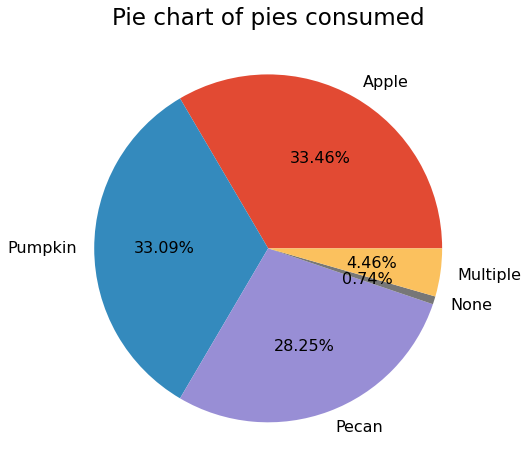

In [53]:
plt.figure(figsize=(8,8))
plt.pie([90,89,76,2,12],labels=pie_types.keys(), autopct='%1.2f%%')
plt.title("Pie chart of pies consumed")
plt.show()

In [7]:
print(data["Age"].value_counts())
income_col = 'How much total combined money did all members of your HOUSEHOLD earn last year?'
print(data[income_col].value_counts()[:2])

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64
$25,000 to $49,999    166
$50,000 to $74,999    127
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64


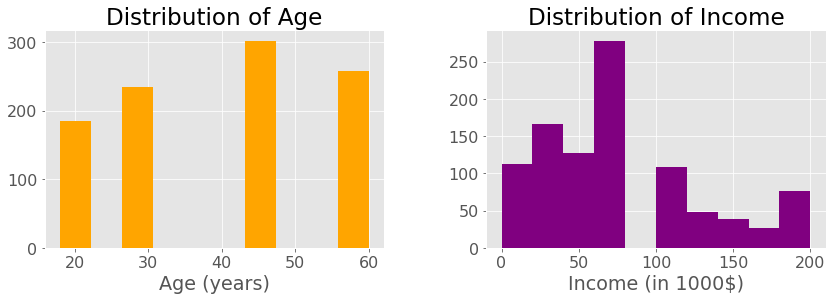

In [8]:
def get_int_age(in_str):
    if pd.isnull(in_str):
        return None
    split_str = in_str.split(" ")
    age_str = re.sub('\+$', '', split_str[0])
    try:
        age_int = int(age_str)
    except Exception: 
        age_int = None
    return age_int

def get_int_income(in_str):
    if pd.isnull(in_str):
        return None
    first_str = in_str.split(" ")[0]
    if first_str== 'Prefer':
        return None
    
    income_str = re.sub('[\$\,]', '', first_str)
    try:
        income_int = int(income_str)
    except Exception: 
        income_int = None
    return income_int/1000
# Clean data 
data["int_age"] = data["Age"].apply(get_int_age)
data["int_income"] = data[income_col].apply(get_int_income)
# Fill missing data with median
data["int_age"] = data["int_age"].fillna(data["int_age"].median())
data["int_income"] = data["int_income"].fillna(data["int_income"].median())
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

data.hist(column = 'int_age', ax=ax1, color='orange')
ax1.set_title("Distribution of Age")
ax1.set_xlabel("Age (years)")
data.hist(column = 'int_income', ax=ax2, color='purple')
ax2.set_title("Distribution of Income")
ax2.set_xlabel("Income (in 1000$)")

plt.show()

In [11]:
# a=data["int_income"]
# a.plot(kind="bar")

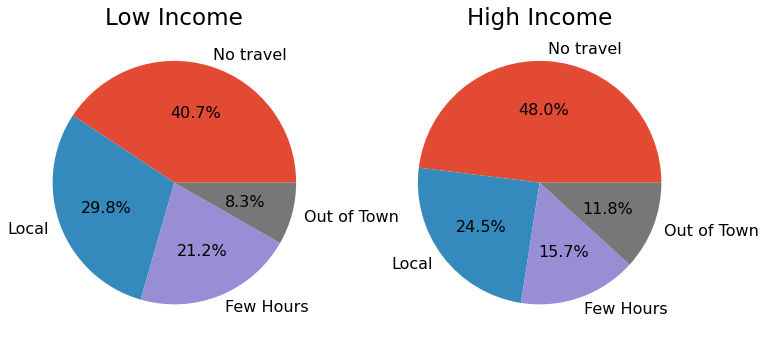

In [12]:
#  low income results <150K
is_low_income = data['int_income'] < 150
dist_low_income = data['How far will you travel for Thanksgiving?'][is_low_income]
value_dist_low = dist_low_income.value_counts()

# high income results >150K
is_high_income = data['int_income'] > 150
dist_high_income = data['How far will you travel for Thanksgiving?'][is_high_income]
value_dist_high = dist_high_income.value_counts()
# pie plots
my_label = ["No travel", "Local","Few Hours","Out of Town"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.pie(value_dist_low, labels=my_label, autopct='%1.1f%%')
ax1.set_title("Low Income")

ax2.pie(value_dist_high, labels=my_label, autopct='%1.1f%%')
ax2.set_title("High Income")
fig.subplots_adjust(hspace=6)
plt.show()

In [ ]:
enter a date like='12/02/2021'

check the validity of date




In [39]:
 
date=input("Enter the date dd/mm/yyyy  ")
date
dd,mm,yy = date.split("/")
dd=int(dd)
mm=int(mm)
yy=int(yy)
 
if (mm==1 or mm==3 or mm==5 or mm==7 or mm==8 or mm==10 or mm==12):
      max1=31
elif (mm==4 or mm==6 or mm==9 or mm==11):
      max1=30
elif (yy%4 ==0 and yy%100 !=0 or yy%400 ==0):
      max1=29
else:
      max1=28
 
if mm <1 or mm>12:
      print("Date is invalid")
 
elif (dd<1 or dd> max1):
      print("Date is invalid")
 
elif dd==max1 and mm !=12:
      dd=1
      mm=mm+1
      print("the incremented date is :", dd,mm, yy)
elif dd==31 and mm==12:
      dd=1
      mm=1
      yy=yy+1
      print("the incremented date is :", dd,mm, yy)
else:
      dd=dd+1
      print("the incremented date is :", dd,mm, yy)


Enter the date dd/mm/yyyy  29/02/2021
Date is invalid


In [34]:
# import the pandas library
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Year')
print (grouped.get_group(2014))

     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
